# ICS 485 Course Project:
Ahmed Alzuhair -- ID: 202278540

Abdulaziz Alqahtani -- ID: 202283240

## Setup

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Imbalance
from imblearn.over_sampling import SMOTE

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# CV & metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, make_scorer

In [111]:
df = pd.read_csv("dataset-train-vf.csv")

df_test = pd.read_csv("dataset-test-vf.csv")

print("train dataset shape:", df.shape)

print("test dataset shape:", df_test.shape)

print("Training dataset")
display(df.head())

print("Testing Dataset")
df_test.head()


train dataset shape: (4480, 13)
test dataset shape: (792, 12)
Training dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,y
0,1,NaN,62330,NaN,0.748,4.845455,30405,18.066667,2.807634,663180,NaN,C1,square
1,2,NaN,4370,NaN,0.858,1.072727,2445,1.266667,0.712986,49420,NaN,C2,square
2,3,0.000729,1449,196.3,0.841,0.172727,795,0.420000,0.112528,16240,NaN,C2,square
3,4,0.043499,24702,349.7,0.594,5.254545,9570,7.160000,2.417831,239680,0.430355,C3,circle
4,5,0.000972,1104,162.5,0.792,0.109091,570,0.320000,0.066930,12040,NaN,C3,square


Testing Dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4


## Data Analysis and Preprocessing


Training Missing values per column:
 ID        0
f1     1838
f2        0
f3     1384
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10    3912
f11       0
y         0
dtype: int64
\Testing Missing values per column:
 ID       0
f1     306
f2       0
f3     243
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10    668
f11      0
dtype: int64

Statistics:
                 ID           f1            f2           f3           f4  \
count  4480.000000  2642.000000  4.480000e+03  3096.000000  4480.000000   
mean   2240.500000     0.007127  2.559716e+04   234.375598     0.786005   
std    1293.408932     0.009138  9.400564e+04   106.207714     0.163220   
min       1.000000     0.000081  1.610000e+02    35.750000     0.062000   
25%    1120.750000     0.001397  2.783000e+03   170.300000     0.681000   
50%    2240.500000     0.003321  7.590000e+03   218.075000     0.802500   
75%    3360.250000     0.008586  2.270100e+04   271.050000     0.920000 

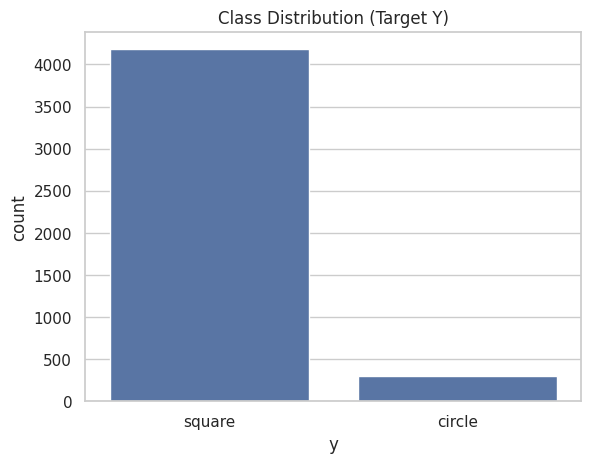

In [112]:
print("\nTraining Missing values per column:\n", df.isna().sum())

print("\Testing Missing values per column:\n", df_test.isna().sum())

print("\nStatistics:\n", df.describe())


# Class distribution
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution (Target Y)")
plt.show()

In [113]:
df_test

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4
...,...,...,...,...,...,...,...,...,...,...,...,...
787,5268,0.017578,64883,234.65,0.686,9.263636,29010,18.806667,4.922775,665700,NaN,C2
788,5269,0.024139,54832,157.30,0.791,5.236364,28290,15.893333,3.208563,597800,NaN,C2
789,5270,0.000405,1265,425.75,0.727,0.327273,600,0.366667,0.184310,13300,0.581246,C4
790,5271,0.004374,11178,124.15,0.741,0.845455,5400,3.240000,0.485303,118440,NaN,C2


In [114]:
# Load CSV files
df_train = pd.read_csv("dataset-train-vf.csv")
df_test  = pd.read_csv("dataset-test-vf.csv")
submission = pd.read_csv("Submission.csv")

print("Train:", df_train.shape, " Test:", df_test.shape)

# Drop ID (identifier) and f10 (too many NaNs and hurt score empirically)
df_train = df_train.drop(columns=["ID", "f10"])
df_test  = df_test.drop(columns=["ID", "f10"])

# Features
X_train = df_train.drop(columns=["y"])

# Target
# Features / target
X_train = df_train.drop(columns=["y"])
y_str = df_train["y"]					# 'circle' / 'square'

# Binary target: circle = 1 (positive) for F1
y_train = (y_str == "circle").astype(int)

print("Class ratio (0=square,1=circle):")
print(pd.Series(y_train).value_counts(normalize=True))

Train: (4480, 13)  Test: (792, 12)
Class ratio (0=square,1=circle):
y
0    0.933259
1    0.066741
Name: proportion, dtype: float64


In [115]:
X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11
0,NaN,62330,NaN,0.748,4.845455,30405,18.066667,2.807634,663180,C1
1,NaN,4370,NaN,0.858,1.072727,2445,1.266667,0.712986,49420,C2
2,0.000729,1449,196.30,0.841,0.172727,795,0.420000,0.112528,16240,C2
3,0.043499,24702,349.70,0.594,5.254545,9570,7.160000,2.417831,239680,C3
4,0.000972,1104,162.50,0.792,0.109091,570,0.320000,0.066930,12040,C3
...,...,...,...,...,...,...,...,...,...,...
4475,0.009964,22632,261.30,0.750,3.600000,11070,6.560000,2.091549,241080,C2
4476,NaN,6003,NaN,0.502,0.445455,1965,1.740000,0.173225,54880,C1
4477,0.004698,13340,52.65,0.224,0.427273,1950,3.866667,0.074141,99400,C4
4478,0.003402,8694,225.55,0.915,1.190909,5190,2.520000,0.844120,101360,C4


### *2.1 Data Cleaning*

In [116]:
from sklearn.pipeline import Pipeline
# Enable IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Separate numeric & categorical columns
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric:", num_cols)
print("Categorical:", cat_cols)


# Advanced Preprocessing Pipeline:
# 1. IterativeImputer (MICE): Intelligent filling of missing values.
# 2. PowerTransformer: Corrects distribution to be Gaussian (Yeo-Johnson).
# 3. PolynomialFeatures: Creates interaction terms (e.g., f1*f2) to capture non-linear relationships.
numeric_pipe = Pipeline(steps=[
	("imputer", IterativeImputer(max_iter=15, random_state=42)),
    ("power", PowerTransformer(method="yeo-johnson", standardize=True)),
])


# Categorical: one-hot encode
categorical_pipe = OneHotEncoder(handle_unknown="ignore")

# Full preprocessing
preprocess = ColumnTransformer(
	transformers=[
		("num", numeric_pipe, num_cols),
		("cat", categorical_pipe, cat_cols),
	]
)

Numeric: ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
Categorical: ['f11']


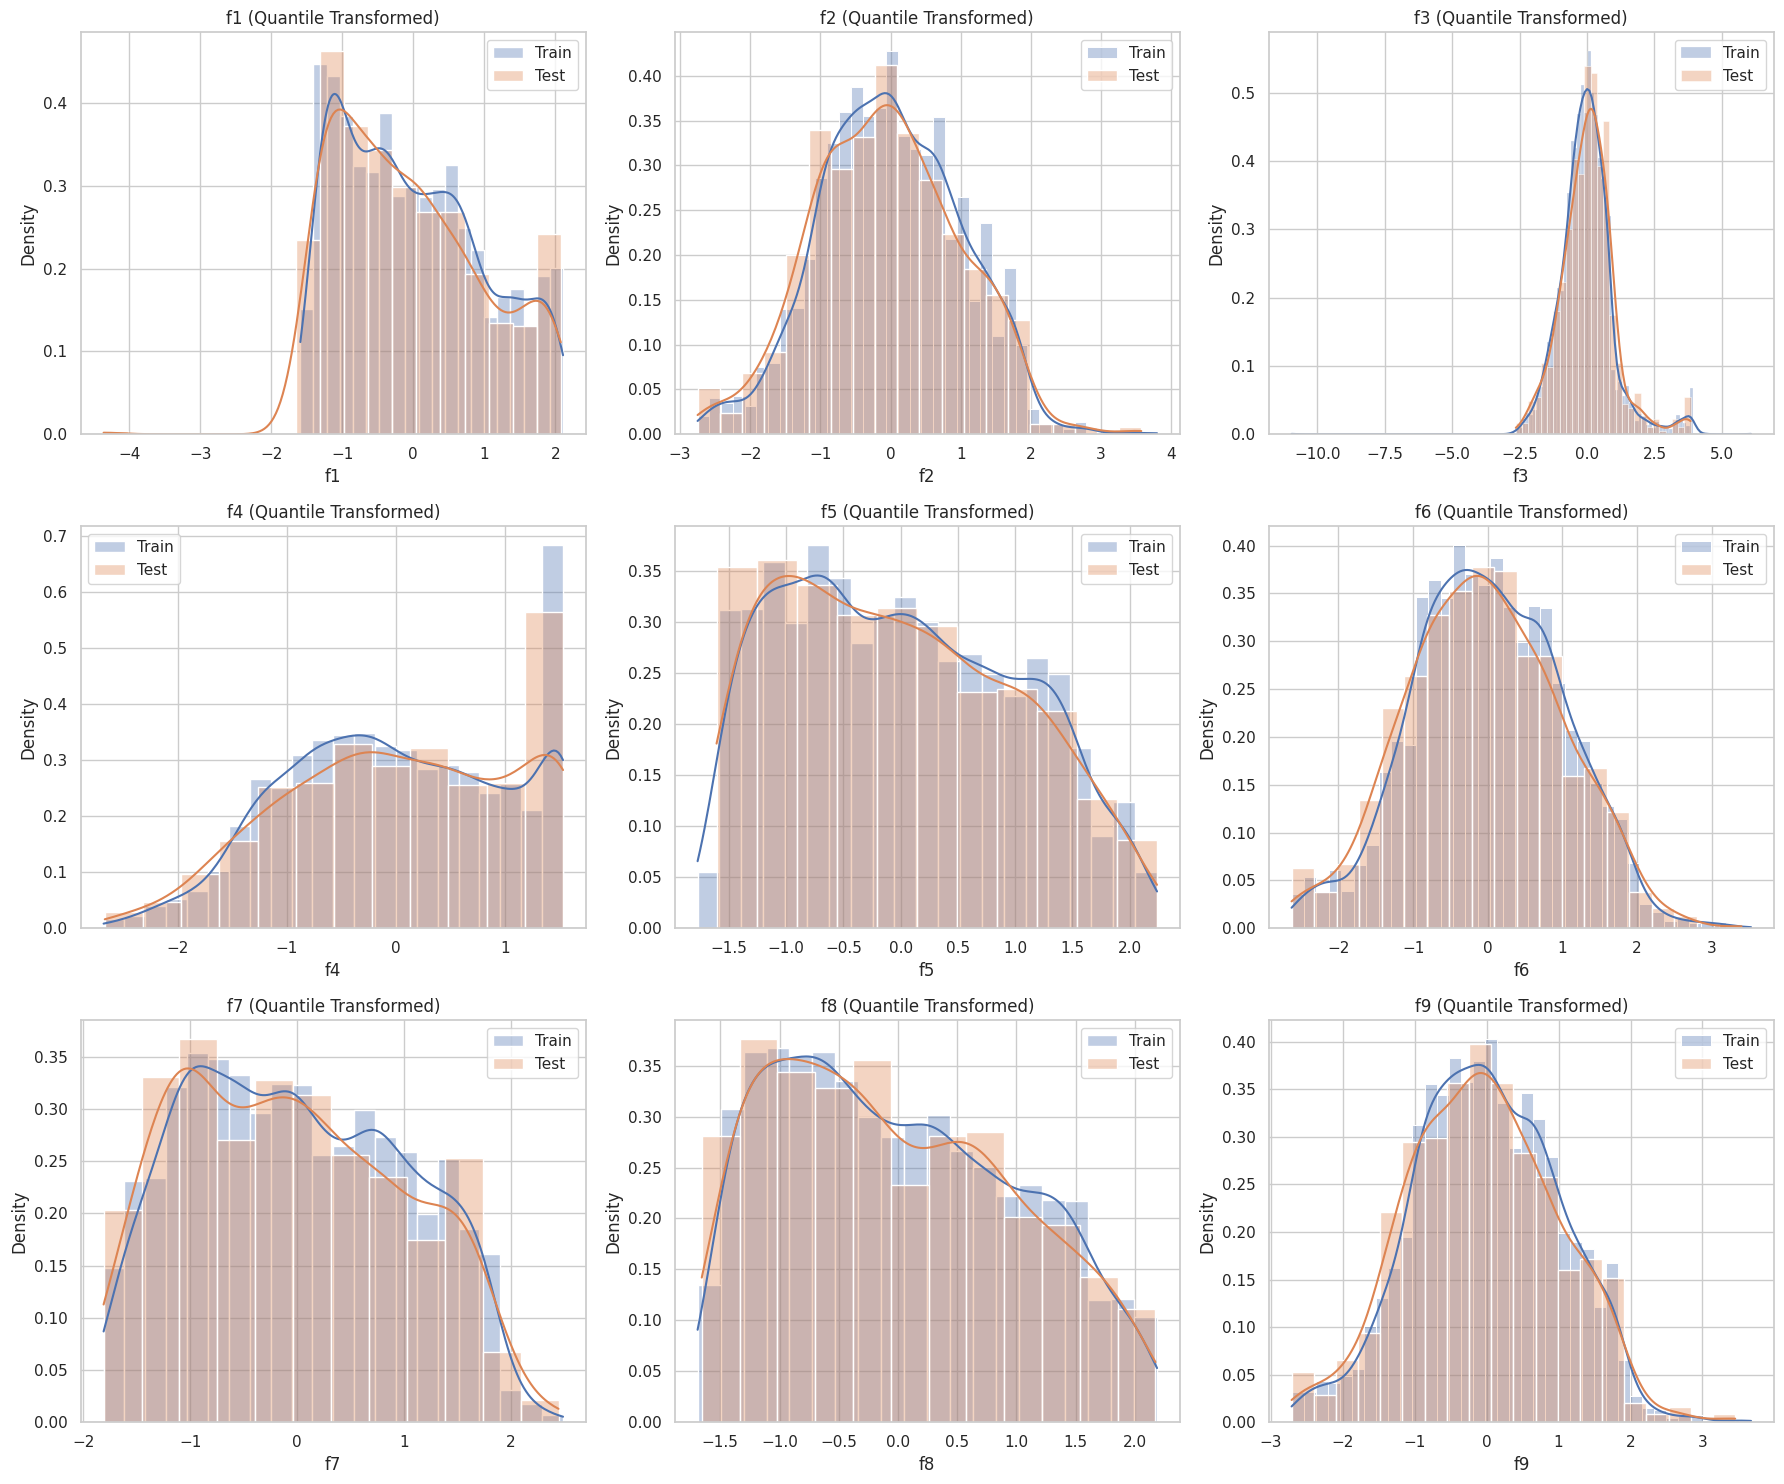

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer

# -----------------------------
# 1) Select numeric columns shared by train/test
# -----------------------------
num_cols = [
	c for c in df.select_dtypes(include=["int64", "float64"]).columns
	if c not in ["ID", "y"] and c in df_test.columns
]

Xtr = df[num_cols].copy()
Xte = df_test[num_cols].copy()

# -----------------------------
# 2) Preprocess (fit on TRAIN only)
# -----------------------------
# We use the same logic as the main pipeline: QuantileTransformer
numeric_pipe = Pipeline(steps=[
	("imputer", IterativeImputer(max_iter=15, random_state=42)),
    ("power", PowerTransformer(method="yeo-johnson", standardize=True)),
])

Xtr_p = numeric_pipe.fit_transform(Xtr)
Xte_p = numeric_pipe.transform(Xte)

# Get feature names (includes missing-indicator columns)
imputer = numeric_pipe.named_steps["imputer"]
try:
	feature_names = imputer.get_feature_names_out(num_cols)
except Exception:
	# Fallback if sklearn version doesn't support get_feature_names_out
	base = list(num_cols)
	indicator = imputer.indicator_
	if indicator is not None:
		missing_cols = [num_cols[i] for i in indicator.features_]
		feature_names = base + [f"{c}_missing" for c in missing_cols]
	else:
		feature_names = base

df_tr = pd.DataFrame(Xtr_p, columns=feature_names)
df_te = pd.DataFrame(Xte_p, columns=feature_names)

# -----------------------------
# 3) Visualization: Train vs Test distributions
# -----------------------------
sns.set_theme(style="whitegrid")

cols_per_row = 3
plot_cols = feature_names

n_rows = (len(plot_cols) + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(18, 5 * n_rows))
axes = np.array(axes).reshape(-1)

for ax, col in zip(axes, plot_cols):
	sns.histplot(df_tr[col], kde=True, stat="density", alpha=0.35, ax=ax, label="Train")
	sns.histplot(df_te[col], kde=True, stat="density", alpha=0.35, ax=ax, label="Test")
	ax.set_title(f"{col} (Quantile Transformed)")
	ax.legend()

for ax in axes[len(plot_cols):]:
	ax.axis("off")

plt.tight_layout()
plt.show()

## Models and Training

In [118]:
from tqdm.auto import tqdm
import joblib
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Patch joblib to report into tqdm (works with GridSearchCV / RandomizedSearchCV)
class TqdmJoblib(joblib.parallel.BatchCompletionCallBack):
	def __init__(self, *args, **kwargs):
		self.tqdm_bar = kwargs.pop("tqdm_bar")
		super().__init__(*args, **kwargs)

	def __call__(self, *args, **kwargs):
		self.tqdm_bar.update(n=self.batch_size)
		return super().__call__(*args, **kwargs)

from contextlib import contextmanager

@contextmanager
def tqdm_joblib(tqdm_bar):
	old_callback = joblib.parallel.BatchCompletionCallBack
	joblib.parallel.BatchCompletionCallBack = lambda *a, **k: TqdmJoblib(*a, tqdm_bar=tqdm_bar, **k)
	try:
		yield tqdm_bar
	finally:
		joblib.parallel.BatchCompletionCallBack = old_callback
		tqdm_bar.close()

In [119]:
# Stratified K-fold (keeps imbalance ratio in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 on minority class (circle=1)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Store tuned models here
model_registry = {}

def fit_and_log(name, estimator, param_grid):
	"""
	Wrapper around GridSearchCV.
	- estimator: (Imb)Pipeline with preprocess inside
	- param_grid: hyper-parameters dict
	"""
	print(f"\n========== {name} ==========\n")

	grid = GridSearchCV(
		estimator=estimator,
		param_grid=param_grid,
		scoring=f1_scorer,
		cv=cv,
		n_jobs=-1,					# keep parallel CV
		refit=True,
		verbose=0,					# tqdm replaces verbose spam
		return_train_score=True
	)

	# total fits = candidates * folds
	n_candidates = len(list(ParameterGrid(param_grid)))
	n_folds = cv.get_n_splits()
	total_fits = n_candidates * n_folds

	with tqdm_joblib(tqdm(total=total_fits, desc=f"{name} CV fits", unit="fit")):
		grid.fit(X_train, y_train)

	print(f"{name} best params:", grid.best_params_)
	print(f"{name} mean CV F1(circle): {grid.best_score_:.4f}")

	model_registry[name] = {
		"estimator": grid.best_estimator_,
		"cv_f1": grid.best_score_,
		"grid": grid
	}

	return grid

In [120]:
def plot_model_cv(name):
	grid = model_registry[name]["grid"]
	res = grid.cv_results_

	train = res["mean_train_score"]
	val   = res["mean_test_score"]
	x = np.arange(len(val))

	plt.figure()
	plt.plot(x, train, marker="o", label="Train F1")
	plt.plot(x, val, marker="o", label="CV F1")
	plt.title(f"{name} - Train vs CV (F1 circle)")
	plt.xlabel("Hyperparameter setting index")
	plt.ylabel("F1")
	plt.legend()
	plt.grid(True)
	plt.show()

In [121]:
models = {}

### KNN

In [122]:
from imblearn.over_sampling import RandomOverSampler

In [123]:
# KNN + SMOTE (instance-based, high variance)
# SMOTE creates synthetic points to help the model generalize better than simple duplication
models["KNN"] = {
	"estimator": ImbPipeline(steps=[
		("preprocess", preprocess),
		("over", SMOTE(random_state=42)),
		("clf", KNeighborsClassifier())
	]),
	"param_grid": {
		"clf__n_neighbors": [3, 5, 7, 9, 11, 13],
		"clf__weights": ["uniform", "distance"],
		"clf__p": [1, 2],
	}
}

In [124]:
fit_and_log("KNN", models["KNN"]["estimator"], models["KNN"]["param_grid"])


========== KNN ==========



KNN CV fits:   0%|          | 0/120 [00:00<?, ?fit/s]

KNN best params: {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'distance'}
KNN mean CV F1(circle): 0.5601


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=15,
                                                                                                           random_state=42)),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['f1',
                                                                          'f2',
                                                                          'f3',
                                                                          'f4',
                                                                          'f5',
                                                                          'f6',
                                                                          'f7',
                                                                          'f8',
                                                                          'f9']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['f11'])])),
                                       ('over', SMOTE(random_state=42)),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [3, 5, 7, 9, 11, 13],
                         'clf__p': [1, 2],
                         'clf__weights': ['uniform', 'distance']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

### SVM

In [127]:
# SVM (Expanded Hyperparameter Space)
models["SVM"] = {
	"estimator": ImbPipeline(steps=[
		("preprocess", preprocess),
		("over", SMOTE(random_state=42)),
		("clf", SVC(
			probability=True, # needed for soft voting/stacking
			random_state=42
		))
	]),
	# Using a list of dictionaries to handle kernel-specific parameters
	"param_grid": [
        {
            "clf__kernel": ["rbf"],
            "clf__C": [0.1, 1, 10, 100, 1000],
            "clf__gamma": ["scale", "auto", 0.01, 0.1],
            "clf__class_weight": ["balanced", None],
            "clf__shrinking": [True, False]
        },
        {
            "clf__kernel": ["linear"],
            "clf__C": [0.1, 1, 10, 100],
            "clf__class_weight": ["balanced", None],
            "clf__shrinking": [True, False]
        },
        {
            "clf__kernel": ["poly"],
            "clf__degree": [2, 3, 4],
            "clf__C": [0.1, 1, 10],
            "clf__gamma": ["scale", "auto"],
            "clf__coef0": [0.0, 0.5, 1.0],
            "clf__class_weight": ["balanced", None]
        }
    ]
}

In [128]:
fit_and_log("SVM", models["SVM"]["estimator"], models["SVM"]["param_grid"])


========== SVM ==========



SVM CV fits:   0%|          | 0/1020 [00:00<?, ?fit/s]

SVM best params: {'clf__C': 100, 'clf__class_weight': 'balanced', 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__shrinking': True}
SVM mean CV F1(circle): 0.6262


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=15,
                                                                                                           random_state=42)),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['f1',
                                                                          'f2',
                                                                          'f3',
                                                                          'f4',
                                                                          'f5',
                                                                          'f6',
                                                                          'f7',
                                                                          'f8',
                                                                          'f9']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore')...
                         {'clf__C': [0.1, 1, 10, 100],
                          'clf__class_weight': ['balanced', None],
                          'clf__kernel': ['linear'],
                          'clf__shrinking': [True, False]},
                         {'clf__C': [0.1, 1, 10],
                          'clf__class_weight': ['balanced', None],
                          'clf__coef0': [0.0, 0.5, 1.0],
                          'clf__degree': [2, 3, 4],
                          'clf__gamma': ['scale', 'auto'],
                          'clf__kernel': ['poly']}],
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

### Neural Network

In [129]:
# MLP (regularized NN + oversampling)
models["MLP"] = {
	"estimator": ImbPipeline(steps=[
		("preprocess", preprocess),
		("over", SMOTE(random_state=42)),
		("clf", MLPClassifier(
			random_state=42,
			solver="adam",
			max_iter=4000,				# allow convergence, early stopping will cut it
			early_stopping=True,
			validation_fraction=0.2,	# a bit larger holdout for stability
			n_iter_no_change=30,		# more patience
			beta_1=0.9,
			beta_2=0.999,
			shuffle=True
		))
	]),
	"param_grid": {
		# Model capacity (keep moderate)
		"clf__hidden_layer_sizes": [
			(8,), (16,), (32,), (64,),
			(32, 16, 8), (64, 32), (30, 15),
			(10, 20, 10)
		],

		# Activation: relu + tanh (tanh sometimes better with standardized inputs)
		"clf__activation": ["relu", "tanh"],

		# Regularization (alpha): include smaller + stronger values
		"clf__alpha": [1e-4, 1e-3, 1e-1],

		# Learning rate init: include smaller steps (helps stability)
		"clf__learning_rate_init": [1e-3, 3e-3],

		# Schedule: adaptive is often best with early stopping
		"clf__learning_rate": ["constant", "adaptive"],

		# Batch size: big impact on generalization + speed
		"clf__batch_size": [64, 128, 256],

		# Gradient clipping-ish effect: tighter tolerance helps stop noise chasing
		"clf__tol": [1e-4, 1e-5],
	}
}

In [130]:
fit_and_log("MLP", models["MLP"]["estimator"], models["MLP"]["param_grid"])


========== MLP ==========



MLP CV fits:   0%|          | 0/5760 [00:00<?, ?fit/s]

MLP best params: {'clf__activation': 'tanh', 'clf__alpha': 0.0001, 'clf__batch_size': 256, 'clf__hidden_layer_sizes': (64,), 'clf__learning_rate': 'constant', 'clf__learning_rate_init': 0.003, 'clf__tol': 0.0001}
MLP mean CV F1(circle): 0.6644


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=15,
                                                                                                           random_state=42)),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['f1',
                                                                          'f2',
                                                                          'f3',
                                                                          'f4',
                                                                          'f5',
                                                                          'f6',
                                                                          'f7',
                                                                          'f8',
                                                                          'f9']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore')...
                         'clf__alpha': [0.0001, 0.001, 0.1],
                         'clf__batch_size': [64, 128, 256],
                         'clf__hidden_layer_sizes': [(8,), (16,), (32,), (64,),
                                                     (32, 16, 8), (64, 32),
                                                     (30, 15), (10, 20, 10)],
                         'clf__learning_rate': ['constant', 'adaptive'],
                         'clf__learning_rate_init': [0.001, 0.003],
                         'clf__tol': [0.0001, 1e-05]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

### Ensemble Method

In [138]:
# Full preprocessing
numeric_pipe = Pipeline(steps=[
	("imputer", IterativeImputer(max_iter=15, random_state=42)),
])


# Categorical: one-hot encode
categorical_pipe = OneHotEncoder(handle_unknown="ignore")

# Full preprocessing
preprocess = ColumnTransformer(
	transformers=[
		("num", numeric_pipe, num_cols),
		("cat", categorical_pipe, cat_cols),
	]
)

In [139]:
# Random Forest (bagging + random subspace, classic low-bias trees)
models["RandomForest"] = {
	"estimator": Pipeline(steps=[
		("preprocess", preprocess),
		("clf", RandomForestClassifier(
			random_state=42,
			n_jobs=-1,
			class_weight="balanced"
		))
	]),
	"param_grid": {
		"clf__n_estimators": [100, 200, 300, 400],
		"clf__max_depth": [None, 8, 12, 18],
		"clf__min_samples_leaf": [5, 10, 15],
		"clf__max_features": ["sqrt", 0.5],
        "clf__min_samples_split": [2, 6, 10, 15, 20],
        "clf__bootstrap": [True, False],
        "clf__max_samples": [None, 0.5],
		# Bootstrap sampling (keep TRUE for RF theory)
		"clf__bootstrap": [True],
		# Pruning (light, safe)
		"clf__ccp_alpha": [0.0, 1e-3, 1e-2],
	}
}


In [140]:
fit_and_log("RandomForest", models["RandomForest"]["estimator"], models["RandomForest"]["param_grid"])


========== RandomForest ==========



RandomForest CV fits:   0%|          | 0/14400 [00:00<?, ?fit/s]

RandomForest best params: {'clf__bootstrap': True, 'clf__ccp_alpha': 0.0, 'clf__max_depth': 12, 'clf__max_features': 0.5, 'clf__max_samples': None, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
RandomForest mean CV F1(circle): 0.6580


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=15,
                                                                                                           random_state=42))]),
                                                                         ['f1',
                                                                          'f2',
                                                                          'f3',
                                                                          'f4',
                                                                          'f5',
                                                                          'f6',
                                                                          'f7',
                                                                          'f8',
                                                                          'f9']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['f11'])])),
                                       ('clf',
                                        RandomFor...
             param_grid={'clf__bootstrap': [True],
                         'clf__ccp_alpha': [0.0, 0.001, 0.01],
                         'clf__max_depth': [None, 8, 12, 18],
                         'clf__max_features': ['sqrt', 0.5],
                         'clf__max_samples': [None, 0.5],
                         'clf__min_samples_leaf': [5, 10, 15],
                         'clf__min_samples_split': [2, 6, 10, 15, 20],
                         'clf__n_estimators': [100, 200, 300, 400]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [141]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos

models["XGBoost"] = {
	"estimator": Pipeline(steps=[
		("preprocess", preprocess),
		("clf", XGBClassifier(
			objective="binary:logistic",
			eval_metric="logloss",
			tree_method="hist",
			random_state=42,
			n_jobs=-1,
			scale_pos_weight=scale_pos_weight,
			# small safety defaults (generalization)
			booster="gbtree",
			grow_policy="depthwise",
		))
	]),
	"param_grid": {
		# bias/variance tradeoff
		"clf__n_estimators": [300, 400, 600],
		"clf__learning_rate": [0.03, 0.05, 0.1],

		# keep trees shallow
		"clf__max_depth": [3, 4, 5],
		"clf__min_child_weight": [3, 5, 10],

		# overfit control via randomness
		"clf__subsample": [0.7, 0.85, 1.0],

		# split/leaf regularization
		"clf__reg_alpha": [0.0, 1e-3, 1e-2],	# add L1

		# extra stability for imbalance (often helps)
		"clf__max_delta_step": [0, 1],
	}
}

In [142]:
fit_and_log("XGBoost", models["XGBoost"]["estimator"], models["XGBoost"]["param_grid"])


========== XGBoost ==========



XGBoost CV fits:   0%|          | 0/7290 [00:00<?, ?fit/s]

XGBoost best params: {'clf__learning_rate': 0.1, 'clf__max_delta_step': 1, 'clf__max_depth': 4, 'clf__min_child_weight': 3, 'clf__n_estimators': 600, 'clf__reg_alpha': 0.0, 'clf__subsample': 0.7}
XGBoost mean CV F1(circle): 0.7178


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=15,
                                                                                                           random_state=42))]),
                                                                         ['f1',
                                                                          'f2',
                                                                          'f3',
                                                                          'f4',
                                                                          'f5',
                                                                          'f6',
                                                                          'f7',
                                                                          'f8',
                                                                          'f9']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['f11'])])),
                                       ('clf',
                                        XGBClassi...
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.03, 0.05, 0.1],
                         'clf__max_delta_step': [0, 1],
                         'clf__max_depth': [3, 4, 5],
                         'clf__min_child_weight': [3, 5, 10],
                         'clf__n_estimators': [300, 400, 600],
                         'clf__reg_alpha': [0.0, 0.001, 0.01],
                         'clf__subsample': [0.7, 0.85, 1.0]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [143]:
print(model_registry)

{'KNN': {'estimator': Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(max_iter=15,
                                                                                    random_state=42)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['f1', 'f2', 'f3', 'f4', 'f5',
                                                   'f6', 'f7', 'f8', 'f9']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['f11'])])),
                ('over', SMOTE(random_state=42)),
                ('clf',
    

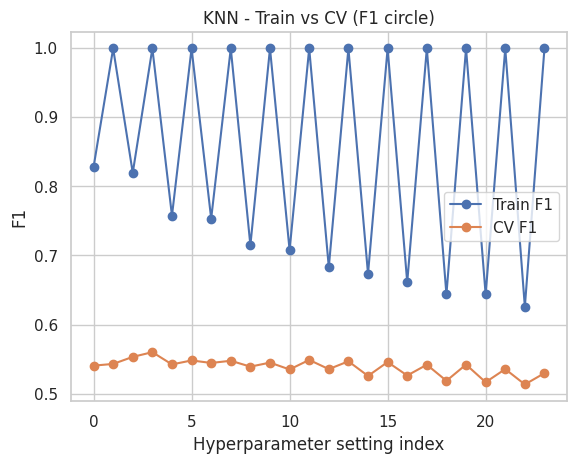

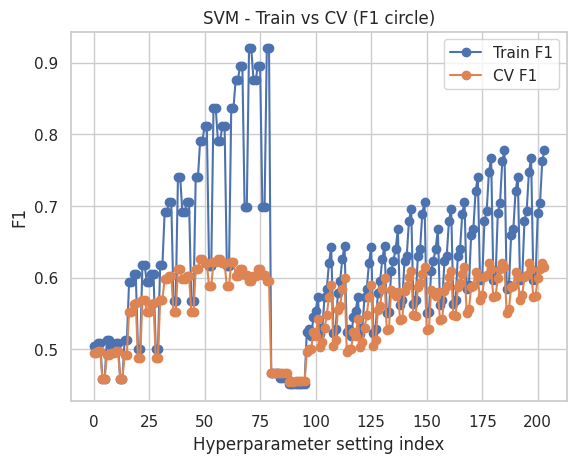

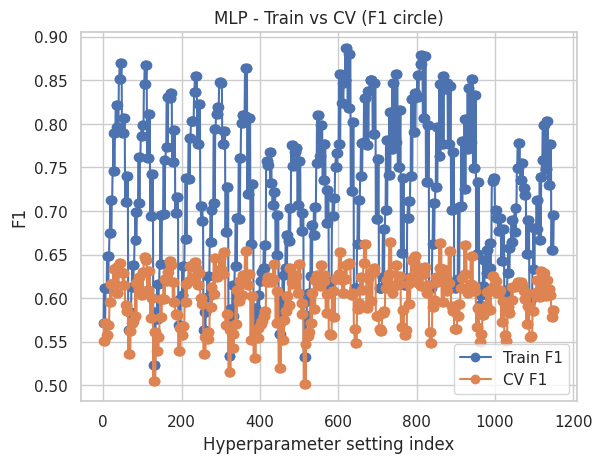

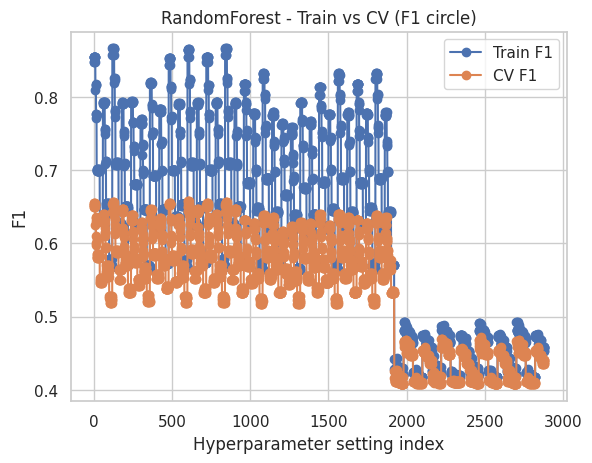

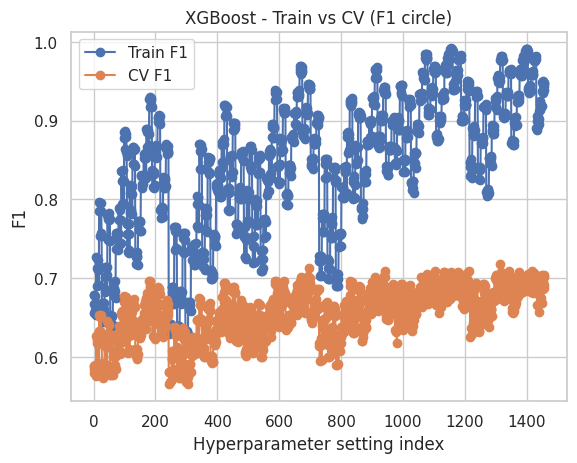

In [144]:
for name in model_registry:
	if "grid" in model_registry[name]:
		plot_model_cv(name)

In [145]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Rank all tuned models

sorted_models = sorted(
	model_registry.items(),
	key=lambda kv: kv[1]["cv_f1"],
	reverse=True
)

print("\n=== Base models ranked by CV F1 ===")
for name, info in sorted_models:
	print(f"{name:15s} | CV F1(circle) = {info['cv_f1']:.4f}")

# FORCE DIVERSITY for ensembles
family_priority = [
	"KNN",
	"SVM",
	"MLP",
	"RandomForest",
	"XGBoost"
]

selected = []
used = set()

for family_name in family_priority:
	if family_name in model_registry and family_name not in used:
		selected.append((family_name, model_registry[family_name]["estimator"]))
		used.add(family_name)


# Fallback: if not enough models found, fill from top-ranked remaining
if len(selected) < 4:
	for name, info in sorted_models:
		if name not in used:
			selected.append((name, info["estimator"]))
			used.add(name)
		if len(selected) >= 4:
			break


=== Base models ranked by CV F1 ===
XGBoost         | CV F1(circle) = 0.7178
MLP             | CV F1(circle) = 0.6644
RandomForest    | CV F1(circle) = 0.6580
SVM             | CV F1(circle) = 0.6262
KNN             | CV F1(circle) = 0.5601


In [146]:
from sklearn.svm import LinearSVC

print("\n=== Selected base estimators for ensembles (diversity-aware) ===")
for name, est in selected:
	print("-", name)

# Weights based on their CV F1 (better model gets more vote)
weights = [model_registry[name]["cv_f1"] for name, _ in selected]

# -----------------------------
# Weighted Soft Voting Ensemble
voting_clf = VotingClassifier(
	estimators=selected,
	voting="soft",
	weights=weights,
	n_jobs=-1
)

print("\nVotingEnsemble")
voting_scores = cross_val_score(
	voting_clf, X_train, y_train,
	cv=cv,
	scoring=f1_scorer,
	n_jobs=-1
)
voting_mean_f1 = voting_scores.mean()
print(f"VotingEnsemble mean CV F1(circle): {voting_mean_f1:.4f}")

model_registry["VotingEnsemble"] = {
	"estimator": voting_clf,
	"cv_f1": voting_mean_f1
}

# -----------------------------
# Stacking Ensemble
stacking_clf = StackingClassifier(
	estimators=selected,
	stack_method="predict_proba",
	n_jobs=-1,
	cv=cv,
	passthrough=False,
)

print("\nStackingEnsemble")
stacking_scores = cross_val_score(
	stacking_clf, X_train, y_train,
	cv=cv,
	scoring=f1_scorer,

	n_jobs=-1
)
stacking_mean_f1 = stacking_scores.mean()
print(f"StackingEnsemble mean CV F1(circle): {stacking_mean_f1:.4f}")

model_registry["StackingEnsemble"] = {
	"estimator": stacking_clf,
	"cv_f1": stacking_mean_f1
}


=== Selected base estimators for ensembles (diversity-aware) ===
- KNN
- SVM
- MLP
- RandomForest
- XGBoost

VotingEnsemble
VotingEnsemble mean CV F1(circle): 0.6841

StackingEnsemble
StackingEnsemble mean CV F1(circle): 0.6863


In [149]:
print("\n========== SUMMARY OF ALL MODELS ==========\n")

# Sort models by CV score to find the best one
sorted_models = sorted(model_registry.items(), key=lambda x: x[1]['cv_f1'], reverse=True)

# Display table
for name, info in sorted_models:
    print(f"{name:20s} | CV F1(circle) = {info['cv_f1']:.4f}")

best_name = "XGBoost"	# force
best_model = model_registry[best_name]["estimator"]

print(f"\nSelection: {best_name} (forced)")
print(f"CV F1(circle) = {model_registry[best_name]['cv_f1']:.4f}")

best_model.fit(X_train, y_train)


========== SUMMARY OF ALL MODELS ==========

XGBoost              | CV F1(circle) = 0.7178
StackingEnsemble     | CV F1(circle) = 0.6863
VotingEnsemble       | CV F1(circle) = 0.6841
MLP                  | CV F1(circle) = 0.6644
RandomForest         | CV F1(circle) = 0.6580
SVM                  | CV F1(circle) = 0.6262
KNN                  | CV F1(circle) = 0.5601

Selection: XGBoost (forced)
CV F1(circle) = 0.7178


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(max_iter=15,
                                                                                    random_state=42))]),
                                                  ['f1', 'f2', 'f3', 'f4', 'f5',
                                                   'f6', 'f7', 'f8', 'f9']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['f11'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsamp...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy='depthwise',
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=4, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=600, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [151]:
# Predict directly (no manual threshold) → 0/1
y_test_pred = best_model.predict(df_test)

# Submission expects binary labels
submission_bin = submission.copy()
submission_bin["y"] = y_test_pred.astype(int)

submission_bin.to_csv("Submission_best.csv", index=False)
print("\nSaved 'Submission_best_binary.csv' with binary predictions.")


Saved 'Submission_best_binary.csv' with binary predictions.
